In [16]:
import pandas as pd
import yfinance as yf


EXTRAEMOS LA INFORMACION DE LOS ACTIVOS USANDO LA LIBRERIA DE YAHOO FINANCE DE 2020-01-01",to="2024-12-31

In [17]:
tickers=['SHEL','CVX','BKR','NKE','SAM','FORD','GOOG','DELL','AMZN','MRVL','GOVT','TLT','IBTA.L','IEF','IEI','SHY']

In [18]:
df = yf.download(tickers, start="2020-01-01", end="2024-12-31",auto_adjust=False,interval='1d')
#df=pd.DataFrame(data)
#df.head()
df.head()

[*********************100%***********************]  16 of 16 completed


Price       Adj Close                                                    \
Ticker           AMZN        BKR        CVX       DELL  FORD       GOOG   
Date                                                                      
2020-01-02  94.900497  21.962622  96.158699  24.481894  10.1  68.046196   
2020-01-03  93.748497  21.988346  95.826103  23.676605  10.0  67.712273   
2020-01-06  95.143997  21.885439  95.501442  23.915380  10.3  69.381882   
2020-01-07  95.343002  21.516674  94.281929  23.316093  10.2  69.338577   
2020-01-08  94.598503  21.242249  93.204964  23.409731  10.3  69.885002   

Price                                                 ...     Volume  \
Ticker           GOVT  IBTA.L        IEF         IEI  ...       GOVT   
Date                                                  ...              
2020-01-02  23.160833  5.2520  99.027901  114.476173  ...  4774300.0   
2020-01-03  23.276682  5.2560  99.689682  114.839699  ...  2830000.0   
2020-01-06  23.249950  5.2530  99.582397  114.776054  ...  5352700.0   
2020-01-07  23.205397  5.2580  99.439285  114.730637  ...  4796600.0   
2020-01-08  23.169743  5.2545  99.206726  114.576149  ...  6174900.0   

Price                                                                       \
Ticker        IBTA.L        IEF       IEI        MRVL        NKE       SAM   
Date                                                                         
2020-01-02  175688.0  4022300.0  555900.0   6503200.0  5644100.0  122000.0   
2020-01-03  176247.0  3839600.0  673300.0   9732300.0  4541800.0  122500.0   
2020-01-06  605939.0  2714300.0  363500.0  10432100.0  4612400.0   87700.0   
2020-01-07  961275.0  2038800.0  410100.0   7493800.0  6719900.0  177300.0   
2020-01-08  986588.0  5081100.0  935300.0   7860800.0  4942200.0  124800.0   

Price                                         
Ticker           SHEL        SHY         TLT  
Date                                          
2020-01-02  3085246.0  2665200.0  11034100.0  
2020-01-03  3713515.0  2039900.0  12366000.0  
2020-01-06  3250736.0  1132100.0  11369800.0  
2020-01-07  2683199.0  1103400.0   8381200.0  
2020-01-08  2966175.0  1864300.0  10621700.0  

[5 rows x 96 columns]

¡Por supuesto! Vamos a desmenuzarlo de manera sencilla:

---

### ✅ ¿Qué es `'Adj Close'` en `yfinance`?

`'Adj Close'` significa **"Precio de Cierre Ajustado"**.

Es el **precio real que refleja el valor de una acción considerando eventos como:**

- **Splits** (divisiones de acciones)
- **Dividendos**
- **Reinversiones**
- **Fusiones o escisiones**

---

### 🍕 Ejemplo simple:

Supón que compras una acción en **$100**, y luego la empresa hace un split 2:1.  
Ahora cada acción vale **$50**, pero tú tienes el doble.

El **precio de cierre real** fue $100,  
pero el **"precio ajustado"** dirá $50 para que todo el historial tenga **coherencia** y sea comparable.

---

### 🧮 ¿Cómo se calcula?

El **precio ajustado** lo calcula Yahoo Finance (no tú directamente). Lo que hace es:

```python
Adj Close = Close × Factor de ajuste
```

Donde el **factor de ajuste** considera:

- Cuántos dividendos se pagaron (y cuándo)
- Si hubo splits (por cuántas acciones se dividió)
- Otros ajustes corporativos

---

### 🧠 ¿Por qué es importante usar `Adj Close`?

Usa `Adj Close` cuando:

- Quieres analizar el **crecimiento real** de una acción en el tiempo.
- Estás calculando **rendimientos históricos** o estrategias de inversión a largo plazo.

Porque si solo usas `Close`, podrías pensar que una acción bajó de precio después de un split… ¡cuando en realidad no perdiste dinero!

---

### 📊 Ejemplo rápido en código:

```python
import yfinance as yf

data = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
adj_close = data["Adj Close"]

print(adj_close.head())
```

---

¿Quieres que hagamos un gráfico comparando `Close` vs `Adj Close` para que lo veas visualmente?

In [19]:
df_Adj_close=df['Adj Close']

In [20]:
df_Adj_close.head()

Ticker,AMZN,BKR,CVX,DELL,FORD,GOOG,GOVT,IBTA.L,IEF,IEI,MRVL,NKE,SAM,SHEL,SHY,TLT
Date,,,,,,,,,,,,,,,,
2020-01-02,94.900497,21.962622,96.158699,24.481894,10.1,68.046196,23.160833,5.2520,99.027901,114.476173,26.706507,96.001976,371.119995,48.650616,76.313332,119.346947
2020-01-03,93.748497,21.988346,95.826103,23.676605,10.0,67.712273,23.276682,5.2560,99.689682,114.839699,26.013977,95.738991,367.700012,49.033367,76.376434,121.184952
2020-01-06,95.143997,21.885439,95.501442,23.915380,10.3,69.381882,23.249950,5.2530,99.582397,114.776054,25.048332,95.654427,371.570007,49.644142,76.349388,120.496834
2020-01-07,95.343002,21.516674,94.281929,23.316093,10.2,69.338577,23.205397,5.2580,99.439285,114.730637,25.604307,95.607468,373.880005,49.188099,76.349388,119.904449
2020-01-08,94.598503,21.242249,93.204964,23.409731,10.3,69.885002,23.169743,5.2545,99.206726,114.576149,25.409227,95.391403,373.380005,48.609894,76.313332,119.111801


REORDENAMOS LAS COLUMNAS PRIMERO LOS ACTIVOS DE RENTA VARIABLE Y DEPSUES LOS DE RENTA FIJA ETFS

In [21]:
column_order=['SHEL','CVX','BKR','NKE','SAM','FORD','GOOG','DELL','AMZN','MRVL','GOVT','TLT','IBTA.L','IEF','IEI','SHY']

In [22]:
df_Adj_close=df_Adj_close[column_order]




Limpiamos los datos NA interpolando

In [23]:
print(df_Adj_close.isna().any())


Ticker
SHEL      True
CVX       True
BKR       True
NKE       True
SAM       True
FORD      True
GOOG      True
DELL      True
AMZN      True
MRVL      True
GOVT      True
TLT       True
IBTA.L    True
IEF       True
IEI       True
SHY       True
dtype: bool


In [24]:
print(df_Adj_close.isna().sum())

Ticker
SHEL      30
CVX       30
BKR       30
NKE       30
SAM       30
FORD      30
GOOG      30
DELL      30
AMZN      30
MRVL      30
GOVT      30
TLT       30
IBTA.L    26
IEF       30
IEI       30
SHY       30
dtype: int64


In [25]:
print(df_Adj_close.isna().any().any())

True


INTERPOLAMOS PARA ELIMINAR LOS NA DEL DATAFRAME

In [26]:
# Interpolar valores NA
df_Adj_close = df_Adj_close.interpolate(method='linear', axis=0)

In [27]:
# COMPROBAMOS QUE SE HAYAN ELIMINADO LOS DATOS NA
df_Adj_close.isna().any()

Ticker
SHEL      False
CVX       False
BKR       False
NKE       False
SAM       False
FORD      False
GOOG      False
DELL      False
AMZN      False
MRVL      False
GOVT      False
TLT       False
IBTA.L    False
IEF       False
IEI       False
SHY       False
dtype: bool

EMPEZAMOS A REALIZAR CAMBIOS PORCENTUALES CON ENFOQUE LOGARITMICO

Explicación:

np.log(df_Adj_close): Calcula el logaritmo natural de los precios.

.diff(): Calcula las diferencias entre valores consecutivos (rendimientos logarítmicos).

.dropna(): Elimina las filas con valores NaN que aparecen debido a la primera diferencia (la primera fila no tiene un valor anterior para calcular la diferencia).


In [28]:
import numpy as np 

# Calcular los rendimientos logarítmicos y eliminar valores NA
ret_assets = np.log(df_Adj_close).diff().dropna()

# Mostrar los primeros valores
print(ret_assets.head())


Ticker          SHEL       CVX       BKR       NKE       SAM      FORD  \
Date                                                                     
2020-01-03  0.007837 -0.003465  0.001171 -0.002743 -0.009258 -0.009950   
2020-01-06  0.012379 -0.003394 -0.004691 -0.000884  0.010470  0.029559   
2020-01-07 -0.009229 -0.012852 -0.016993 -0.000491  0.006198 -0.009756   
2020-01-08 -0.011825 -0.011489 -0.012836 -0.002262 -0.001338  0.009756   
2020-01-09 -0.000168 -0.001615  0.010842 -0.000689 -0.010500  0.009662   

Ticker          GOOG      DELL      AMZN      MRVL      GOVT       TLT  \
Date                                                                     
2020-01-03 -0.004919 -0.033446 -0.012213 -0.026273  0.004989  0.015283   
2020-01-06  0.024358  0.010034  0.014776 -0.037827 -0.001149 -0.005694   
2020-01-07 -0.000624 -0.025378  0.002089  0.021953 -0.001918 -0.004928   
2020-01-08  0.007850  0.004008 -0.007839 -0.007648 -0.001538 -0.006633   
2020-01-09  0.010984 -0.007629  0.004

¡Excelente pregunta! 👏 Esa transformación:

```python
ret_assets = np.log(df_Adj_close).diff().dropna()
```

se usa muy comúnmente en **finanzas cuantitativas** y te voy a explicar **paso a paso y con analogía de niño** por qué se hace.

---

### 🧠 Objetivo: Calcular los **rendimientos logarítmicos** de los precios ajustados.

---

## 👶 Explicación como si fueras un niño:

Imagina que los precios de tus dulces favoritos (o acciones) cambian cada día.

- Un día cuesta $10, al otro día cuesta $11.
- ¿Qué tanto subió? Eso es el **rendimiento** 📈

---

### 1️⃣ `np.log(df_Adj_close)`  
👉 Esto convierte los precios en **logaritmos naturales**.

💡 ¿Por qué usar logaritmos?

Porque te permiten comparar cambios de forma más limpia y tienen propiedades matemáticas útiles:

- Te permiten sumar rendimientos en lugar de multiplicar precios.
- Hacen que los cambios relativos (porcentaje) se comporten de forma **simétrica**.

---

### 2️⃣ `.diff()`  
👉 Esto calcula la **diferencia entre un día y el anterior**.

En vez de hacer:

```python
(t1 - t0) / t0  # rendimiento porcentual
```

con logaritmos haces:

```python
log(t1) - log(t0) = log(t1 / t0)
```

📌 ¡Es lo mismo que un rendimiento porcentual, pero en forma logarítmica!

---

### 3️⃣ `.dropna()`  
👉 Esto elimina el primer valor vacío (porque no hay día anterior para comparar).

---

### 🧮 Resultado final:

`ret_assets` es un DataFrame donde cada fila te dice:

> “¿Cuánto cambió el precio **(en forma logarítmica)** con respecto al día anterior?”

---

### 📊 ¿Por qué es útil?

- Es más preciso para modelos financieros.
- Sirve para análisis estadístico (media, volatilidad, correlaciones).
- Es la forma preferida en modelos como CAPM, portafolios de Markowitz, etc.

---

¿Te gustaría que te muestre cómo calcular la media y la volatilidad de esos rendimientos también? 📉📊

EMPEZAMOS A GRAFICAR LAS LINEAS

In [36]:

nike_adj=df_Adj_close['NKE']
nike_adj.head()


nike_ret=ret_assets['NKE']
nike_ret.head()





Date
2020-01-03   -0.002743
2020-01-06   -0.000884
2020-01-07   -0.000491
2020-01-08   -0.002262
2020-01-09   -0.000689
Name: NKE, dtype: float64

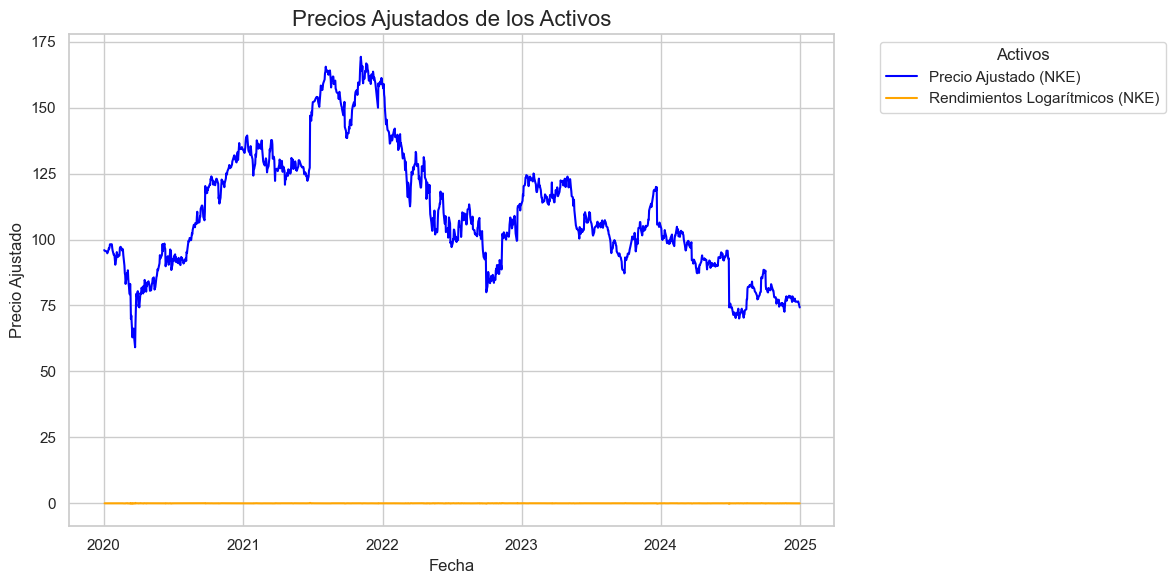

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_Adj_close['NKE'], label="Precio Ajustado (NKE)", color="blue")

# Personalizar el gráfico
plt.title("Precios Ajustados de los Activos", fontsize=16)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Precio Ajustado", fontsize=12)
plt.legend(title="Activos", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

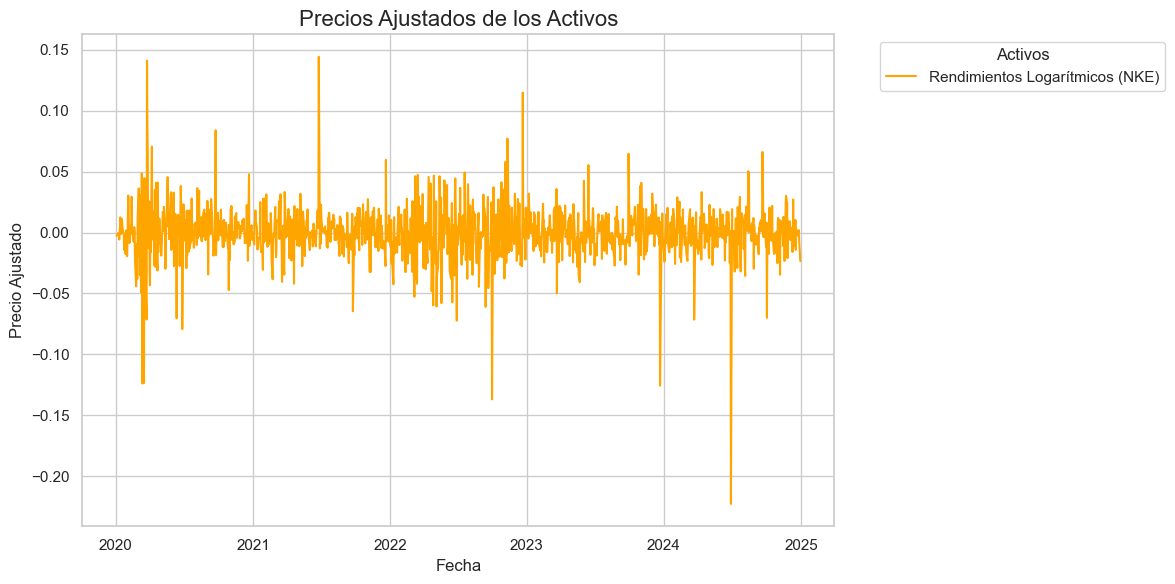

In [40]:

import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(ret_assets['NKE'], label="Rendimientos Logarítmicos (NKE)", color="orange")


# Personalizar el gráfico
plt.title("Precios Ajustados de los Activos", fontsize=16)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Precio Ajustado", fontsize=12)
plt.legend(title="Activos", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()